In [143]:
#istalling modules
import sys
get_ipython().system('{sys.executable} -m pip install wordcloud')
# get_ipython().system('{sys.executable} -m pip install pandas')

# get_ipython().system('{sys.executable} -m pip install nltk')


In [144]:
import csv
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import webtext, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt 
from wordcloud import WordCloud


In [145]:
nltk.download('stopwords')#articles, pronouns, prepositions, and conjunctions
nltk.download('vader_lexicon') # for sentimemnt analysis
nltk.download('punkt')# divides a text into a list of word
nltk.download('movie_reviews')
nltk.download('averaged_perceptron_tagger')
# stopwords.words('english')
# nltk.download('state_union')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akikomcquerrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/akikomcquerrey/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akikomcquerrey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/akikomcquerrey/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/akikomcquerrey/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [146]:
#lemmertizing 
#using WordNetLemmatizer() to group inflected forms. 
#download wordnet to use lemmertizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akikomcquerrey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h2>Please Noe: The original data was huge (75MB) so minified prior to starting analysis to fit in the file size restriction for submission. Code below presented as markdown to show what I did earlier just in case </h2>
<code> 
df=pd.read_csv('spotify_millsongdata.csv')
df.dropna(inplace = True)

#function to search if depeche mode is in the data frame

def find_artist(df_p,name):
    for index, row in df_p.iterrows():
        if row['artist'] == name:
            row_index = df.loc[df['artist'] == name].index
            return row_index

#Save the parts that matter to the original csv
df_p1 = df[1400:2000] 
df_p2 = df[4000:4300] 
df_p4= df[25200:29813]


#combine the dataframes and save to csv

def minify(df_part):
    artist_list =[]
    song_list = []
    lyrics_list = []
    
    for index, row in df_part.iterrows():          
        artist_list.append(row['artist'])
        song_list.append(row['song'])
        lyrics_list.append(row['text'])
        
    #first save to dictionary
    dict_dm = {'artist': artist_list,'song': song_list, 'lyrics': lyrics_list }

    #saving to data frame
    field_names_all = ['artist','song_title', 'lyrics'] 
    mini_df = pd.DataFrame(dict_dm)
    return mini_df

frames = [minify(df_p1),minify(df_p2), minify(df_p4)]
result = pd.concat(frames)
  
#saving the dictonary of song and lyrics to new csv
result.to_csv('minified_spotify.csv')
</code>

<h2>Creating Data Frame from (minified version of) CSV </h2>

In [147]:
df=pd.read_csv('minified_spotify.csv',encoding='utf-8', keep_default_na=False,skipinitialspace=True)
df


,Unnamed: 0,artist,song,lyrics
0,0,Billy Joel,Christie Lee,Let me tell you a story \r\nAbout a woman and...
1,1,Billy Joel,Christmas In Fallujah,It's evening in the desert \r\nI'm tired and ...
2,2,Billy Joel,Close To The Borderline,"Blackout, heatwave,.44 caliber homicide \r\nT..."
3,3,Billy Joel,Code Of Silence,Everybody's got a million questions \r\nEvery...
4,4,Billy Joel,Don't Worry Baby (Live),"(This one's for Alexa, okay?) \r\n \r\nAh, a..."
...,...,...,...,...
5508,4608,Diana Ross,Love Is Like An Itching In My Heart,"The love bug done bit me, \r\nDidn't mean for..."
5509,4609,Diana Ross,Love Lies,"Whenever I touch you lately, you seem to pull ..."
5510,4610,Diana Ross,Love Me,Love me \r\n \r\nLove me the way that you lo...
5511,4611,Diana Ross,Love On The Line,When I don't see you \r\nAnd I don't know whe...


In [148]:
print(type(df))
print(df.shape)
print(df.all(axis=0))
print(df.index)

<class 'pandas.core.frame.DataFrame'>
(5513, 4)
Unnamed: 0    False
artist         True
song           True
lyrics         True
dtype: bool
RangeIndex(start=0, stop=5513, step=1)


 <!-- <h2>Creating Dataframe just with Depeche Mode Song</h2> -->

In [149]:
# depeche_lyrics_df=pd.read_csv('dp_songs.csv',encoding='utf-8', keep_default_na=False,skipinitialspace=True)
# depeche_lyrics_df


167 song lyrics

<h2>Check if it has every song is lyrical. means lyrics cell should not be empty.</2>

In [150]:
empty_rows = df.isnull().all(axis=1)
print(empty_rows)

#print out each row see if True's there
for i in empty_rows:
    if i == True: 
        print("empty",i)


0       False
1       False
2       False
3       False
4       False
        ...  
5508    False
5509    False
5510    False
5511    False
5512    False
Length: 5513, dtype: bool


<h2>check/ remove duplicate</h2>

In [151]:
df_lyrics = df.drop_duplicates(subset=['song'])
print(len(df_lyrics))


5201


<!-- <h2>It seems there's no duplicate but lets see what songs are in the data</h2> <p> lets display by alphabetical order.</p> -->

In [152]:
# df_lyrics=df_lyrics.sort_values('song')
# for row in df_lyrics['song']:
#     print(row)
# print(len(df_lyrics))

<h2>See we got the artist we need our data</h2>

In [153]:
def find_artist_only(df_p,name):
    row_index = df.loc[df['artist'] == name].index
    print(row_index)


In [154]:
find_artist_only(df, "Depeche Mode")



Index([ 682,  683,  684,  685,  686,  687,  688,  689,  690,  691,
       ...
       5276, 5277, 5278, 5279, 5280, 5281, 5282, 5283, 5284, 5285],
      dtype='int64', length=167)


In [155]:
find_artist_only(df, "Black Sabbath")

Index([  86,   87,   88,   89,   90,   91,   92,   93,   94,   95,
       ...
       1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367],
      dtype='int64', length=156)


<h2>function to find a song</h2>

In [156]:
def find_song(panda_df,song_title):
    for index, row in panda_df.iterrows():
        #iterating Indexes and rows
        if row['song'] == song_title:
            return row['song'] + " exists at " + str(index)
        
    return song_title + ' doesnt exist'
            

In [157]:
#I first wanted to try with the song I know that is very dark. 
find_song(df,"Blasphemous Rumours")

'Blasphemous Rumours exists at 5198'

In [158]:
#I first wanted to try with the song I know that is very dark. 
find_song(df,"Black Sabbath")


'Black Sabbath exists at 91'

# create new Data frame with only Depeche mode

In [159]:
def save_panda_df(df_part, artist):
    artist_list=[]
    song_list = []
    lyrics_list = []
    
    for index, row in df_part.iterrows():
        if row['artist'] == artist:
            artist_list.append(row['artist'])
            song_list.append(row['song'])
            lyrics_list.append(row['lyrics'])

    #first save to dictionary
    dict_dm = {'artist': artist_list,'song': song_list, 'lyrics': lyrics_list }

    #saving to data frame
    field_names_all = ['artist','song_title', 'lyrics'] 
    artist_df = pd.DataFrame(dict_dm)
    
    return artist_df



In [160]:
#DF for all of DM songs 
depeche_lyrics_df= save_panda_df(df, 'Depeche Mode')
depeche_lyrics_df.head()

,artist,song,lyrics
0,Depeche Mode,Addiction,"I can't help it, I'm not sure what to do \r\n..."
1,Depeche Mode,All That's Mine,I know it's hard to reach you \r\nI know it's...
2,Depeche Mode,And Then...,Let's take a map of the world \r\nTear it int...
3,Depeche Mode,Any Second Now,She remembered all the shadows and the doubts ...
4,Depeche Mode,Barrel Of A Gun,Do you mean this horny creep \r\nSet upon wea...


<h2>See what DM songs are there in alphabetical order</h2>

In [161]:
#sort in alphabetical order
depeche_lyrics = depeche_lyrics_df.sort_values('song')

for row in depeche_lyrics['song']:
    print(row)


A Pain That I'm Used To
A Photograph Of You
A Question Of Lust
A Question Of Time
Addiction
All That's Mine
Alone
Always
And Then...
Any Second Now
Barrel Of A Gun
Behind The Wheel
Better Days (Basteroid 'Dance Is Gone' Vocal Mix)
Black Celebration
Blasphemous Rumours
Blue Dress
Boys Say Go!
Breathe
But Not Tonight
Clean
Comatose
Come Back
Coming Back To You
Compulsion (Evolution Mix)
Condemnation
Corrupt
Damaged People
Dangerous
Death's Door
Dirt
Dream On
Dreaming Of Me
Dressed In Black
Enjoy The Silence
Everything Counts
Fly On The Windscreen
Fools
Fragile Tension
Free
Freelove
Freestate
Get Right With Me
Get The Balance Right
Ghost
Gone (The Vacuous House Mix)
Goodbye
Goodnight Lovers
Halo
Happens All The Time
Happiest Girl
Heaven
Heaven II
Here Is The House
Higher Love
Hole To Feed
Home
I Am You
I Feel Loved
I Feel You
I Like It
I Sometimes Wish I Was Dead
I Want It All
I Want You Now
Ice Machine
If You Want
In A Manner Of Speaking (Trandy Mix)
In Chains
In Sympathy
In Your Memory


<h2> Brackets after song usually indicates alt or mix version. But if there's no original version we need to keep that version. </h2> <p> Perhaps we can search of brackets and if it hits check song one before?    </p>

In [162]:
print(type(depeche_lyrics['song']))


for row in depeche_lyrics.itertuples():
    #if tuple contains no alpha
#     print(type(row.song))
#     print(row.song)
    
    if row.song.isalpha() == False:      
        # see if it is [ ] ( )
        if row.song.endswith(']') or row.song.endswith(')'):            
            print("matched song and index: ", row.song , row.Index)

<class 'pandas.core.series.Series'>
matched song and index:  Better Days (Basteroid 'Dance Is Gone' Vocal Mix) 6
matched song and index:  Compulsion (Evolution Mix) 87
matched song and index:  Gone (The Vacuous House Mix) 98
matched song and index:  In A Manner Of Speaking (Trandy Mix) 110
matched song and index:  Never Turn Your Back On Mother Earth (Bong Magazine) 36
matched song and index:  Smile In A Crowd (Oriental Mix) 53
matched song and index:  Song For Europe (Unreleased Track) 56
matched song and index:  Useless [The Kruder And Dorfmeister Session] 162


# Make sure NOT removing remixed songs without the original version


In [163]:
#make sure NOT removing remixed songs withouy the original version

# Better Days, Compulsion,Gone, In A Manner Of Speaking , 
# Never Turn Your Back On Mother Earth , Smile In A Crowd, Song For Europe, Useless

#
songs_with_remixes = ['Better Days', 'Compulsion', 'Gone', 'In A Manner Of Speaking', 'Never Turn Your Back On Mother Earth' , 'Smile In A Crowd', 'Song For Europe', 'Useless' ]


for index in range (len(songs_with_remixes)):

    print(find_song(depeche_lyrics_df, songs_with_remixes[index]))
   


Better Days doesnt exist
Compulsion doesnt exist
Gone doesnt exist
In A Manner Of Speaking doesnt exist
Never Turn Your Back On Mother Earth doesnt exist
Smile In A Crowd doesnt exist
Song For Europe doesnt exist
Useless exists at 68


<h2>The ones I should remove is  remix version of Useless [The Kruder And Dorfmeister Session]</h2>

In [164]:
#save only rows not matching with a square bracket
depeche_lyrics_df = depeche_lyrics_df[depeche_lyrics_df['song'].str.contains('\[.*')==False ]

In [165]:
depeche_lyrics_df

,artist,song,lyrics
0,Depeche Mode,Addiction,"I can't help it, I'm not sure what to do \r\n..."
1,Depeche Mode,All That's Mine,I know it's hard to reach you \r\nI know it's...
2,Depeche Mode,And Then...,Let's take a map of the world \r\nTear it int...
3,Depeche Mode,Any Second Now,She remembered all the shadows and the doubts ...
4,Depeche Mode,Barrel Of A Gun,Do you mean this horny creep \r\nSet upon wea...
...,...,...,...
161,Depeche Mode,Tora! Tora! Tora!,They were raining from the sky \r\nExploding ...
163,Depeche Mode,Waiting For The Night,I'm waiting for the night to fall \r\nI know ...
164,Depeche Mode,Walking In My Shoes,I would tell you about the things \r\nThey pu...
165,Depeche Mode,Welcome To My World,Welcome to my world \r\nStep right through th...


<h2>Function to tokenize by song</h2> Using for sentimant intensity analysis

In [166]:
#Function to tokenize by song
# print(depeche_lyrics['lyrics'][row])
def tokenize_song(panda_df, row_index):
    song_words = []
    row = row_index

    song= panda_df[row]
# lemmatizer only works with lowercase
#     using nltk tokenise vs python?
    song_words = song_words+nltk.word_tokenize(song.lower())
#    song_words=song.lower().split()
    return song_words
     


In [167]:
#try with Blasphemous Rumour
tokenize_song(depeche_lyrics_df['lyrics'],79)
print(tokenize_song(depeche_lyrics_df['lyrics'],79))

['girl', 'of', 'sixteen', 'whole', 'life', 'ahead', 'of', 'her', 'slashed', 'her', 'wrists', 'bored', 'with', 'life', 'did', "n't", 'succeed', 'thank', 'the', 'lord', 'for', 'small', 'mercies', 'fighting', 'back', 'the', 'tears', 'mother', 'reads', 'the', 'note', 'again', 'sixteen', 'candles', 'burn', 'in', 'her', 'mind', 'she', 'takes', 'the', 'blame', 'it', "'s", 'always', 'the', 'same', 'she', 'goes', 'down', 'on', 'her', 'knees', 'and', 'prays', '[', 'chorus', 'x', '2', ']', 'i', 'do', "n't", 'want', 'to', 'start', 'any', 'blasphemous', 'rumors', 'but', 'i', 'think', 'that', 'god', "'s", 'got', 'a', 'sick', 'sense', 'of', 'humor', 'and', 'when', 'i', 'die', 'i', 'expect', 'to', 'find', 'him', 'laughing', 'girl', 'of', 'eighteen', 'fell', 'in', 'love', 'with', 'everything', 'found', 'new', 'life', 'in', 'jesus', 'christ', 'hit', 'by', 'a', 'car', 'ended', 'up', 'on', 'a', 'life', 'support', 'machine', 'summer', "'s", 'day', 'as', 'she', 'passed', 'away', 'birds', 'were', 'singing', 

<h2> Function to tokenize all songs</h2> Using for word cloud

In [168]:
#Function to tokenize all songs
def tokenize_all_songs(panda_df):
    all_song_words_2d = []
    
    #iterate rows in df and calling song tokenise function above
    for index, row in panda_df.iterrows():
        all_song_words_2d.append(tokenize_song(panda_df['lyrics'],index))

    #flatten to 1D list
    all_song_words_flat = [item for row in all_song_words_2d for item in row]

    # print(len(all_song_words_2d))
#     print(all_song_words_flat)
    return all_song_words_flat

#All Depeche Mode songs 
print(tokenize_all_songs(depeche_lyrics_df))


['i', 'ca', "n't", 'help', 'it', ',', 'i', "'m", 'not', 'sure', 'what', 'to', 'do', 'does', 'seem', 'crazy', ',', 'no', 'good', 'for', 'my', 'health', 'i', "'ve", 'seen', 'the', 'doctor', ',', 'he', "'s", 'come', 'to', 'look', 'at', 'me', 'if', 'you', 'do', "n't", 'believe', 'it', ',', 'do', "n't", 'believe', 'closer', 'all', 'the', 'time', ',', 'closer', 'all', 'the', 'time', 'closer', 'all', 'the', 'time', ',', 'closer', 'all', 'the', 'time', 'now', 'i', "'m", 'saying', 'how', 'i', "'m", 'going', 'to', 'need', 'a', 'pill', 'i', 'need', 'you', 'like', 'a', 'drug', 'to', 'keep', 'my', 'fill', 'i', 'ca', "n't", 'remember', 'everything', 'i', 'do', 'now', 'i', 'put', 'them', ',', 'it', "'s", 'only', 'good', 'to', 'you', 'closer', 'all', 'the', 'time', ',', 'closer', 'all', 'the', 'time', 'closer', 'all', 'the', 'time', ',', 'closer', 'all', 'the', 'time', 'you', 'ca', "n't", 'help', 'but', 'look', 'me', 'in', 'the', 'eye', 'while', 'i', 'come', 'running', ',', 'i', 'do', "n't", 'know', '

<h2>Function to remove stop words </h2>

In [169]:
def stopWords(words_list):

    unique_words = [word for word in words_list if not word in stopwords.words('english') and word.isalpha()] 

    
#     customized_stopwords=['chorus', "can't", 'ca', "n't", "'ve", 'i', "'m", 'the', 'you', 'to', 'and', 'it', 'for', 'me','my', 'at', '\'s', 'could','would','might', "that's", "i'm", 
#                           "we're", "there's",'perhaps','also','that’s','it’s',',','!', '?']
    customized_stopwords=['chorus','x', "'ve", 'i', "'m", 'the', 'you', 'to', 'and', 'it', 'for', 'me','my', 'at', '\'s', 'could','would','might', "that's", "i'm", 
                          "we're", "there's",'perhaps','also','that’s','it’s']

    unique_words_2 = [word for word in unique_words if not word in customized_stopwords] 
    
    return unique_words_2

print(stopWords(tokenize_song(depeche_lyrics_df['lyrics'],79)))



['girl', 'sixteen', 'whole', 'life', 'ahead', 'slashed', 'wrists', 'bored', 'life', 'succeed', 'thank', 'lord', 'small', 'mercies', 'fighting', 'back', 'tears', 'mother', 'reads', 'note', 'sixteen', 'candles', 'burn', 'mind', 'takes', 'blame', 'always', 'goes', 'knees', 'prays', 'want', 'start', 'blasphemous', 'rumors', 'think', 'god', 'got', 'sick', 'sense', 'humor', 'die', 'expect', 'find', 'laughing', 'girl', 'eighteen', 'fell', 'love', 'everything', 'found', 'new', 'life', 'jesus', 'christ', 'hit', 'car', 'ended', 'life', 'support', 'machine', 'summer', 'day', 'passed', 'away', 'birds', 'singing', 'summer', 'sky', 'came', 'rain', 'tear', 'fell', 'mother', 'eye']


<h2>Function to lemmatize Tokens</h2>

In [170]:
ps=PorterStemmer()
lem = WordNetLemmatizer()
#test 
# word_orig="danced"

# word_lo= word_orig.lower() 
# lem.lemmatize(word_lo, pos="v")
#function to lemmatize 

def lemmatize_token(tokens):
    lemmatized_tokens = [lem.lemmatize(word) for word in tokens]
#     return ' '.join(lemmatized_tokens)# string
    return lemmatized_tokens

lemmed=lemmatize_token(stopWords(tokenize_song(depeche_lyrics_df['lyrics'],79)))
print(lemmed)
print(type(lemmed))

['girl', 'sixteen', 'whole', 'life', 'ahead', 'slashed', 'wrist', 'bored', 'life', 'succeed', 'thank', 'lord', 'small', 'mercy', 'fighting', 'back', 'tear', 'mother', 'read', 'note', 'sixteen', 'candle', 'burn', 'mind', 'take', 'blame', 'always', 'go', 'knee', 'prays', 'want', 'start', 'blasphemous', 'rumor', 'think', 'god', 'got', 'sick', 'sense', 'humor', 'die', 'expect', 'find', 'laughing', 'girl', 'eighteen', 'fell', 'love', 'everything', 'found', 'new', 'life', 'jesus', 'christ', 'hit', 'car', 'ended', 'life', 'support', 'machine', 'summer', 'day', 'passed', 'away', 'bird', 'singing', 'summer', 'sky', 'came', 'rain', 'tear', 'fell', 'mother', 'eye']
<class 'list'>


In [171]:
#word frequency test with the first song

#test frequcy with the first song
word_freq_dp_song = nltk.FreqDist(lemmatize_token(stopWords(tokenize_song(depeche_lyrics_df['lyrics'],79))))

word_freq_dp_song

FreqDist({'life': 4, 'girl': 2, 'sixteen': 2, 'tear': 2, 'mother': 2, 'fell': 2, 'summer': 2, 'whole': 1, 'ahead': 1, 'slashed': 1, ...})

<h2> Put tokens back in the string format</h2>
becuase polarity score takes text not list

In [172]:
# cleaned tokens as a text corpus
def clean_corp(token_list):
    corp = ""

    for word in token_list:
        corp = corp +   word + " " 
    return corp



In [173]:
cl_cp=clean_corp(lemmatize_token(stopWords(tokenize_song(depeche_lyrics_df['lyrics'],79))))

cl_cp

'girl sixteen whole life ahead slashed wrist bored life succeed thank lord small mercy fighting back tear mother read note sixteen candle burn mind take blame always go knee prays want start blasphemous rumor think god got sick sense humor die expect find laughing girl eighteen fell love everything found new life jesus christ hit car ended life support machine summer day passed away bird singing summer sky came rain tear fell mother eye '

<h2>Sentiment Analysis Test</h2>

In [174]:
def sent_analyze(corp):
    # create an instance analyzer
    sia = SentimentIntensityAnalyzer()
    
    
    #sentiment analysis for a song
    pol_score = sia.polarity_scores(corp)
    
    return pol_score

In [175]:
#print out Depeche Mode's "Blasphemous Rumours" analysis
print("stopwords filtered", sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(depeche_lyrics_df['lyrics'],79))))))
print("original form", sent_analyze(clean_corp(lemmatize_token(tokenize_song(depeche_lyrics_df['lyrics'],79)))))

stopwords filtered {'neg': 0.161, 'neu': 0.578, 'pos': 0.261, 'compound': 0.8442}
original form {'neg': 0.129, 'neu': 0.732, 'pos': 0.139, 'compound': 0.6878}


neg: the negative sentiment score (between 0 and 1)
neu: the neutral sentiment score (between 0 and 1)
pos: the positive sentiment score (between 0 and 1)
compound: the overall sentiment score (between -1 and 1)

<h2>Question</h2> I read that sentiment analyzer  measures intensity by caps.  since lyrics the intensity is expressed by sound volume or shouting. so analysing with only with text is not going to be accurate?


<h2>Function to save (to dataframe) the results of sentiment analysis by song</h2>

In [176]:
#Function to save (to dataframe) the results of sentiment analysis by song

def save_sent_analyze_by_song(panda_df):
    
    all_sas_2d=[]
    sas = [ ] #pol scores
    song_names = [] #song names
    indices =[]
    #loop over DF 
    #iterate rows in df and calling previously wriiten functions for tokenize lemmatize and sentiment analysis function 
    for index, row in panda_df.iterrows():

        col = (panda_df['song'][index])
        song_names.append((panda_df['song'][index]))
        indices.append(index)

        sa =sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(panda_df['lyrics'],index)))))  
        sas.append(sa)
        #sa_df = pd.DataFrame(sas, index = song_names)
        sa_df = pd.DataFrame(sas, song_names)
#         print(indices)
     
    return sa_df
    
    #flatten to 1D list
# all_song_words_flat = [item for row in all_song_words_2d for item in row]


In [177]:
sa_df_dm = save_sent_analyze_by_song(depeche_lyrics_df)
sa_df_dm

,neg,neu,pos,compound
Addiction,0.029,0.730,0.242,0.9501
All That's Mine,0.172,0.573,0.255,0.8373
And Then...,0.050,0.663,0.286,0.9118
Any Second Now,0.135,0.597,0.268,0.8176
Barrel Of A Gun,0.341,0.557,0.101,-0.9590
...,...,...,...,...
Tora! Tora! Tora!,0.179,0.573,0.248,0.6549
Waiting For The Night,0.075,0.653,0.272,0.9670
Walking In My Shoes,0.065,0.840,0.095,0.4767
Welcome To My World,0.257,0.463,0.280,-0.2023


<h2>Mean Value for each sentiment</h2>

In [178]:
sa_df_mean = sa_df_dm.mean()
sa_df_mean

neg         0.154169
neu         0.575313
pos         0.270620
compound    0.414433
dtype: float64

<h3>Compound says  0.407116 </h3>  Compound goes -1 to 1 so  <= -0.5 can be said negative,  Depeche Mode's average sentiment per song lyrics are not negative at all! Very interesting!

<h2>highest values of each sent  DM songs</h2>



In [179]:
#highest of each sent  DM songs
sa_df_max = sa_df_dm.max()
sa_df_max

neg         0.7050
neu         0.8760
pos         0.6740
compound    0.9987
dtype: float64

<h2>lowest values of each sent  DM songs</h2>


In [180]:
#lowest of each sent  DM songs
sa_df_min = sa_df_dm.min()
sa_df_min

neg         0.0000
neu         0.2480
pos         0.0000
compound   -0.9995
dtype: float64

<h2>Most negative DM song</h2>

In [181]:
#function to find  most neg song using compund
# by compound
def most_neg(pol_score_df):

    for index, row in pol_score_df.iterrows():
        if(row['compound'] == pol_score_df['compound'].min()):
            print(row)
            print(index)


most_neg(sa_df_dm)



neg         0.7050
neu         0.2540
pos         0.0420
compound   -0.9995
Name: Wrong, dtype: float64
Wrong


<h3>The most negative song of DM is "Wrong".  Compound is almost  -1 !!! </h3>

<h2>Find most positive song</h2>

In [182]:
#function to find most pos song using compund
def most_pos(pol_score_df):


    for index, row in pol_score_df.iterrows():
        if(row['compound'] == pol_score_df['compound'].max()):
            print('Compound Val:', row['compound'])
            print('Song:', index)



In [183]:
most_pos(sa_df_dm)

Compound Val: 0.9987
Song: Freelove


<h3>Most Positive song is "Freelove" and compond is almost 1 !</h3> 

In [184]:
# All Depeche Mode Lyrics
# Not sure if this method is the best but see what happens. Probably more relevant with per song average? -->
# # all DP lyrics
# print("All dongs", sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_all_songs(depeche_lyrics_df))))) )


<h2> Comparison to other songs positive &amp negative song </h2>It's bit too vague with just looking at  sentiment numbers of DM songs. Let's compare with the 'Lovely day' by Bill Withers which is perceived by positive song by many people according to the google search. Black Sabbath' Black Sabath is one of the darkest song according to the goole search



<h2>positive song</h2>

In [185]:
#save new song to DF
bill_withers_lyrics_df= save_panda_df(df, 'Bill Withers')

#find the song in DF

find_song(bill_withers_lyrics_df,"Lovely Day")



'Lovely Day exists at 18'

In [186]:
#sentiment analysis 
print("Lovely Day by Bill Withers: ", sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(bill_withers_lyrics_df['lyrics'],18))))))


Lovely Day by Bill Withers:  {'neg': 0.032, 'neu': 0.593, 'pos': 0.375, 'compound': 0.9881}


In [187]:
#calling most pos song of DM to compare
most_pos(sa_df_dm)

Compound Val: 0.9987
Song: Freelove


<h3>Intrestingly the most positive song of Depeche Mode(Freelove) has higher compound value(0.9987) than  Lovely Day by Bill Withers(0.9881).  </h3>

<h2>Black Sabbath' Black Sabath</h2>

In [188]:
#save new song to DF
blacksabbath_lyrics_df= save_panda_df(df, 'Black Sabbath')

#find the song in DF
find_song(blacksabbath_lyrics_df,"Black Sabbath")

'Black Sabbath exists at 5'

In [189]:
#Black Sabbath
#sentiment analysis 
print("Black Sabbath by  Black Sabbath: ", sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(blacksabbath_lyrics_df['lyrics'],5))))))


Black Sabbath by  Black Sabbath:  {'neg': 0.164, 'neu': 0.576, 'pos': 0.26, 'compound': 0.7783}


<h1>Visualization:</h1> <h2> Pie chart</h2>
Those numbers are bit too hard to comprehend so lets visualize.
Pie chart semms to show the ratio of positive, negative and neutral in the more clear manner than bar chart.  ( exlusing compound here) Therefore I am utilizing pie 
chart here to compare with Depechemode songs and Lovely Day.

In [190]:
# function for creaying pie chart from pol score
def create_pie(pol_score, chart_title):
        
    pol_label_list = []
    pol_score_list= []    
    slice_colors = ['#92a8d1','#d5f4e6','#ffef96'] #neg, neu,pos
    #deeaee  #f7786b  #b1cbbb
    
    #chart name
    plt.title(chart_title)

#     pol_label_list = list(pol_score.keys())
#     pol_score_list = list(pol_score.values() 
        
# loop version is better for excluding 'compound'    
    for x in pol_score:
        #exclude compound
        if (x != 'compound'):
            # conditionals for label name to full spelling for clarity
            if x == 'neu':
                pol_label_list.append('Neutral')
            elif x == 'pos':
                pol_label_list.append('Positive')
            else:
                pol_label_list.append('Negative')
                
            pol_score_list.append(pol_score[x])
    

    y = np.array(pol_score_list)
    
    # plot with labels and automatic percentage for clarity
    plt.pie(y,labels = pol_label_list, autopct='%1.1f%%', colors=slice_colors) 
   
    plt.show()

    
    


<h2>Pie Chart of "Black Sabbath by Black Sabbath"  &amp   "Lovely Day by Bill Withers"</h2> Songs preceived as most positive and most negative according to the internet.

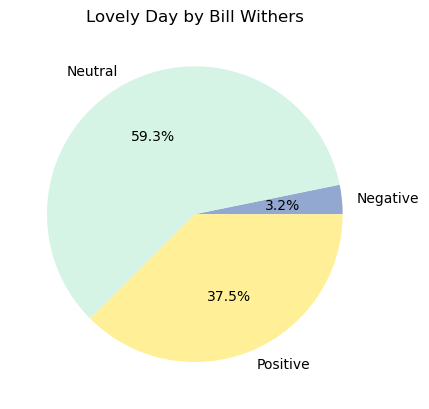

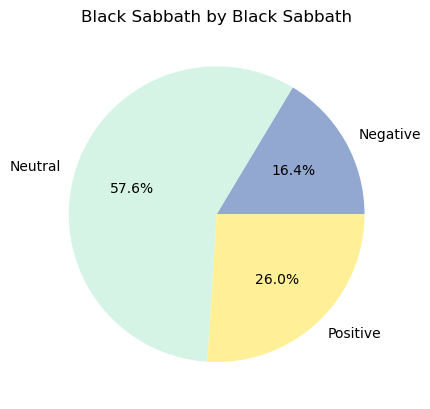

In [191]:
# "Lovely Day"    
pol_score_lovelyday=sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(bill_withers_lyrics_df['lyrics'],18)))))

#Black Sabbath by Black Sabbath 
pol_score_bs_bs= sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(blacksabbath_lyrics_df['lyrics'],5)))))


pie1= create_pie(pol_score_lovelyday, "Lovely Day by Bill Withers")
pie2= create_pie(pol_score_bs_bs, "Black Sabbath by Black Sabbath")




<h2>Piechart: Depeche mode songs</h2> Most negative song and the mean value( average by song)

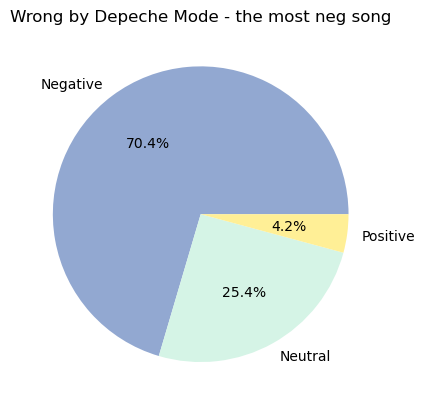

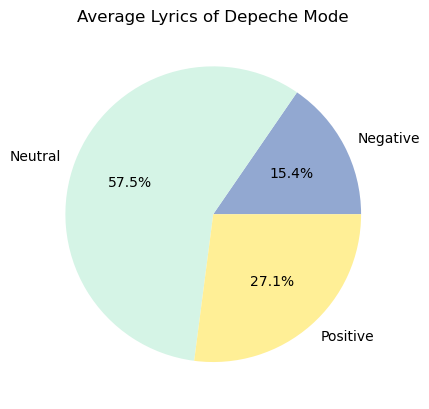

In [192]:

#Depeche Mode analysis: The most neg song and the mean val per son
pol_score_dm_neg=sent_analyze(clean_corp(lemmatize_token(stopWords(tokenize_song(depeche_lyrics_df['lyrics'],166)))))

#Mean of DM songs
pol_score_dm_mean = sa_df_dm.mean() 

pie3= create_pie(pol_score_dm_neg, "Wrong by Depeche Mode - the most neg song"  )
#pie3= create_pie(pol_score_blasphemous, "Blasphemous Rumours By Depeche Mode")

#mean value of DM lyrics, convertig DF to dictionary for pie chart function above
pie4= create_pie(pol_score_dm_mean.to_dict(), "Average Lyrics of Depeche Mode")

<li>Comparing average negative sentiment per song with Black Sabbath (the most negative to be perceived by most), DM songs can be said negative for sure. </li>
<li>Comparing the most negative sentiment song(Wrong) with Black Sabbath's Black Sabbath (the most negative to be perceived by most), DM song may be the darkest song of all songs existing?! </li>

<h4>But what about the compound value? does it make any diffrence?</h4>

<h2>Bar Chart: Comparison between DM average , DM most negative song, Black Sabbath and Lovely Day by acompounds Compound </h2> For compound, horizontal bar chart is easy to see the single value side by side so it seems the best option to compare the songs.

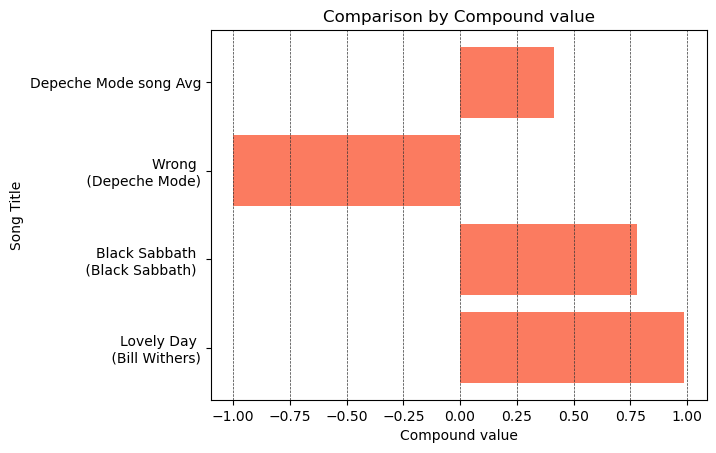

In [193]:
# pol data structure looks like this {'neg': 0.164, 'neu': 0.576, 'pos': 0.26, 'compound': 0.7783}

#df_bars = pd.DataFrame({'song title':['Lovely Day', 'Black Sabbath', 'Wrong' , 'DM Avg'], 'compound':[pol_score_lovelyday['compound'], pol_score_bs_bs['compound'], pol_score_dm_neg['compound'], pol_score_dm_mean.to_dict()['compound'] ]})
#ax = df_bars.plot.bar(x ='song title', y='compound', rot=0 ,color = '#FB7B60')

#y song names
y= ['Lovely Day \n (Bill Withers)', 'Black Sabbath \n (Black Sabbath) ', 'Wrong \n (Depeche Mode)' , 'Depeche Mode song Avg']
#x compound data 
x= [ pol_score_lovelyday['compound'], pol_score_bs_bs['compound'], pol_score_dm_neg['compound'], pol_score_dm_mean.to_dict()['compound'] ]

plt.ylabel("Song Title")
plt.xlabel("Compound value")
# show grid for clarity 
plt.grid(axis ='x', color="#333333", linestyle = '--', linewidth = 0.5)
# plot horizontal bar
plt.barh(y, x, color = '#FB7B60')
# title
plt.title("Comparison by Compound value")

plt.show()

Compound scale from -1 to 1. -0.50 is considered neagtive and 0.5 is positive. Wrong by Depeche Mode is very negative as it is almost -1. Black Sabbath by Black Sabbathis surprisingly indicate as positive since it is above 0.5 it is above 0.  Average Depeche Mode song is 0.25 which can be said as neutral.

In [194]:
#function for creating Bar chart?

<h1>What words are judged as negative, pos, neu?</h1>

In [195]:
#find what words are pos or negative
def pos_neu_neg_words(corp,which_sent):
    
    sia = SentimentIntensityAnalyzer()
    pos_word_list=[]
    neu_word_list=[]
    neg_word_list=[]
    
    for word in corp:
        #compound which is the overall sentiment score is at 0.5 and above positive
        if (sia.polarity_scores(word)['compound']) >= 0.5:
            pos_word_list.append(word)
        #compound which is the overall sentiment score is less tha -0.5 is negative 
        elif (sia.polarity_scores(word)['compound']) <= -0.5:
            neg_word_list.append(word)
        else:
            neu_word_list.append(word)                

    if which_sent == 'pos':
        return pos_word_list
    elif which_sent == 'neu':
        return neu_word_list
    elif which_sent == 'neg':
        return neg_word_list
    else:
        print('Second prameter should be either \"pos" \,"neu"\, "neg".')
        

In [196]:
#Depeche Mode All
print(pos_neu_neg_words(lemmatize_token(stopWords(tokenize_all_songs(depeche_lyrics_df))),'neg'))

['sorrow', 'tortured', 'pain', 'crime', 'condemnation', 'suffer', 'condemnation', 'crime', 'injustice', 'death', 'death', 'death', 'war', 'death', 'death', 'die', 'death', 'pain', 'pain', 'loneliest', 'crime', 'die', 'worst', 'hell', 'sin', 'fail', 'stealing', 'stealing', 'pain', 'pain', 'failed', 'pain', 'sin', 'hate', 'hate', 'hate', 'failing', 'crime', 'crime', 'gloom', 'hate', 'hate', 'hate', 'sin', 'sin', 'sin', 'sin', 'sin', 'sin', 'sin', 'sin', 'sin', 'sin', 'kill', 'saddest', 'loneliest', 'violence', 'perverted', 'sick', 'depression', 'sorrow', 'disastrous', 'hell', 'suffer', 'weep', 'tortured', 'failure', 'death', 'thief', 'death', 'death', 'anger', 'suffer', 'lying', 'sin', 'hurt', 'stupid', 'bitterest', 'stupid', 'devil', 'pain', 'devil', 'bad', 'liar', 'harm', 'stupid', 'failure', 'pain', 'worst', 'sick', 'die', 'pain', 'sorrow', 'hurt', 'dead', 'hate', 'hate', 'threat', 'suffer', 'pain', 'ugly', 'harm', 'hurt', 'hurt', 'hurt', 'death', 'death', 'kill', 'pain', 'pain', 'cur

<h2>This is too hard to read so need to plot but is more meaningful with the most frequent word as too many words in small real estate makes it impossible to read the plot</h2>

<h1> Frequency Analysis</h1>

<h2>TF</h2> What is the  frequency of words used for All Depeche Mode song. 

<h2>Helper function to sort dict data</h2>

In [197]:
# Helper function
# sort dic by value function
def sort_dict(data_dict):
    #sort by value ascending
    keys = list(data_dict.keys())

    values = list(data_dict.values())

    sorted_value_index = np.argsort(values)
    sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
    
    return sorted_dict
    

<h2>Function for counting words</h2>

In [198]:
# straight count of words count 
def raw_count(tokens):
    counts_dict = { } # dictionary
    
    for word in tokens:
        
        if word not in counts_dict:
            #every word should be counted so when iterate automatically 1
            counts_dict[word] = 1
            #when word already there should be +1
        else:
            counts_dict[word]=counts_dict[word]+1
    return counts_dict



<h2>Positive &amp; Negative word Raw Counts</h2>

In [199]:
#positive word frequency
dm_pos_words=raw_count(pos_neu_neg_words(lemmatize_token(stopWords(tokenize_all_songs(depeche_lyrics_df))),'pos'))
#sorted and print frequency
print('Positive words Counts: ', sort_dict(dm_pos_words))

Positive words Counts:  {'adore': 1, 'gain': 1, 'success': 1, 'reward': 1, 'divine': 1, 'rich': 1, 'passionately': 1, 'brilliant': 1, 'positive': 1, 'enlightening': 1, 'enlighten': 1, 'ecstasy': 1, 'glorious': 1, 'brilliantly': 1, 'greatest': 1, 'wisdom': 1, 'great': 1, 'wonderful': 1, 'gracious': 1, 'praise': 1, 'miracle': 1, 'happiness': 2, 'beautiful': 2, 'bliss': 2, 'ideal': 2, 'happier': 2, 'confidence': 2, 'celebrate': 2, 'laugh': 3, 'paradise': 3, 'perfection': 4, 'freedom': 4, 'prize': 4, 'blessed': 4, 'perfect': 4, 'strong': 4, 'happiest': 5, 'heavenly': 5, 'lover': 5, 'glory': 5, 'precious': 5, 'loved': 7, 'beauty': 9, 'trust': 10, 'pleasure': 11, 'happy': 11, 'joy': 11, 'best': 13, 'fun': 13, 'kind': 13, 'peace': 13, 'heaven': 15, 'free': 32, 'love': 171}


In [200]:
#negative  word frequency
dm_neg_words=raw_count(pos_neu_neg_words(lemmatize_token(stopWords(tokenize_all_songs(depeche_lyrics_df))),'neg'))
#sorted and print frequency
print('Negative words Counts: ',sort_dict(dm_neg_words) )
#use panda to see clear way
# pd.DataFrame.from_dict(sort_dict(dm_neg_words), orient='index')


Negative words Counts:  {'fail': 1, 'disastrous': 1, 'depression': 1, 'bitterest': 1, 'perverted': 1, 'bad': 1, 'saddest': 1, 'liar': 1, 'gloom': 1, 'failing': 1, 'threat': 1, 'failed': 1, 'ugly': 1, 'drowned': 1, 'thief': 1, 'heartbreak': 1, 'tragedy': 1, 'evil': 1, 'harshest': 1, 'war': 1, 'cheating': 1, 'injustice': 1, 'cancer': 1, 'cruel': 1, 'murder': 1, 'horror': 1, 'terror': 1, 'curse': 1, 'anger': 2, 'failure': 2, 'died': 2, 'hell': 2, 'condemnation': 2, 'sick': 2, 'loneliest': 2, 'worst': 2, 'stealing': 2, 'tortured': 3, 'danger': 3, 'weep': 3, 'sorrow': 3, 'lying': 4, 'torture': 4, 'kill': 4, 'violence': 4, 'stupid': 5, 'harm': 5, 'misery': 5, 'devil': 5, 'dead': 6, 'crime': 7, 'hurt': 7, 'die': 7, 'hate': 9, 'suffer': 10, 'death': 13, 'sin': 17, 'pain': 31}


<h2>Or counting using NLTK freq</h2>

In [201]:
#nltk freq
dm_neg_words_nltk_freq= nltk.FreqDist(dm_neg_words)

#use panda to see clear way
# pd.DataFrame.from_dict(sort_dict(dm_neg_words_nltk_freq), orient='index')

<h2> IDF to identify keywords of DM songs.  The high value words are more relevant so those can be said as keywords.</h2>  The more frequent in the lyrics = lower value <br> The less frequent in the lyrics = higher value 


In [202]:
# total_words_num = len(pos_neu_neg_words(lemmatize_token(stopWords(tokenize_all_songs(depeche_lyrics_df))),'neg'))


In [203]:
#function to get IDF from tokens
def get_idf_tokens(tokens):
#     call raw_count function above
    raw_counts_dict = raw_count(tokens)
  #get length of tokens / song words
    total_words_num = len(tokens)
      
    idf= { }
    
    for key in raw_counts_dict:
        idf[key] = 1/(raw_counts_dict[key] / (1.0 * total_words_num))
        
    return idf
    


In [204]:
#function for IDF from the raw counts
def get_idf_dict(freq_counts):

   
    total_words_num= len(freq_counts)
    
    idf= { }
    
    for key in counts_dict:
        idf[key] = 1/(counts_dict[key] / (1.0 * total_words_num))
        
    return idf
    

In [205]:
# with negative words IDF
dm_idf_neg=sort_dict(get_idf_tokens(pos_neu_neg_words(lemmatize_token(stopWords(tokenize_all_songs(depeche_lyrics_df))),'neg'))) 

print(dm_idf_neg)


{'pain': 6.483870967741936, 'sin': 11.823529411764705, 'death': 15.461538461538462, 'suffer': 20.099999999999998, 'hate': 22.333333333333336, 'crime': 28.71428571428571, 'die': 28.71428571428571, 'hurt': 28.71428571428571, 'dead': 33.5, 'harm': 40.199999999999996, 'misery': 40.199999999999996, 'devil': 40.199999999999996, 'stupid': 40.199999999999996, 'kill': 50.25, 'lying': 50.25, 'violence': 50.25, 'torture': 50.25, 'danger': 67.0, 'weep': 67.0, 'tortured': 67.0, 'sorrow': 67.0, 'anger': 100.5, 'sick': 100.5, 'failure': 100.5, 'died': 100.5, 'loneliest': 100.5, 'worst': 100.5, 'condemnation': 100.5, 'hell': 100.5, 'stealing': 100.5, 'cheating': 201.0, 'harshest': 201.0, 'heartbreak': 201.0, 'evil': 201.0, 'tragedy': 201.0, 'cruel': 201.0, 'murder': 201.0, 'injustice': 201.0, 'horror': 201.0, 'terror': 201.0, 'cancer': 201.0, 'war': 201.0, 'saddest': 201.0, 'ugly': 201.0, 'perverted': 201.0, 'liar': 201.0, 'bad': 201.0, 'bitterest': 201.0, 'fail': 201.0, 'failed': 201.0, 'failing': 20

In [206]:
#negative words IDF into Dataframe
dm_idf_neg_df=pd.DataFrame.from_dict(dm_idf_neg, orient='index')
# dm_idf_neg_df

Looks more like DM keywords. But for me, straight TF result seems more relevant as DM keywords.

<h2>Plot DM Negative words frequency</h2>

<h2>Function for plotting line graph</h2>

In [207]:
# function for creaying line graph from pol score
def line_graph(pol_score, chart_title):

#     from matplotlib.pyplot import figure
        
    pol_label_list = []
    pol_score_list= []
    pol_label_list = list(pol_score.keys())
    pol_score_list = list(pol_score.values())
    
    plot_height= (len(pol_label_list))*30
    #chart size in pixel
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    plt.subplots(figsize=(600*px,  plot_height*px))
    

    #chart name
    plt.title(chart_title)
    


    x= np.array(pol_label_list)
    y = np.array(pol_score_list)
      
        

        
    plt.plot(y, pol_label_list)
                  
#     plt.show()



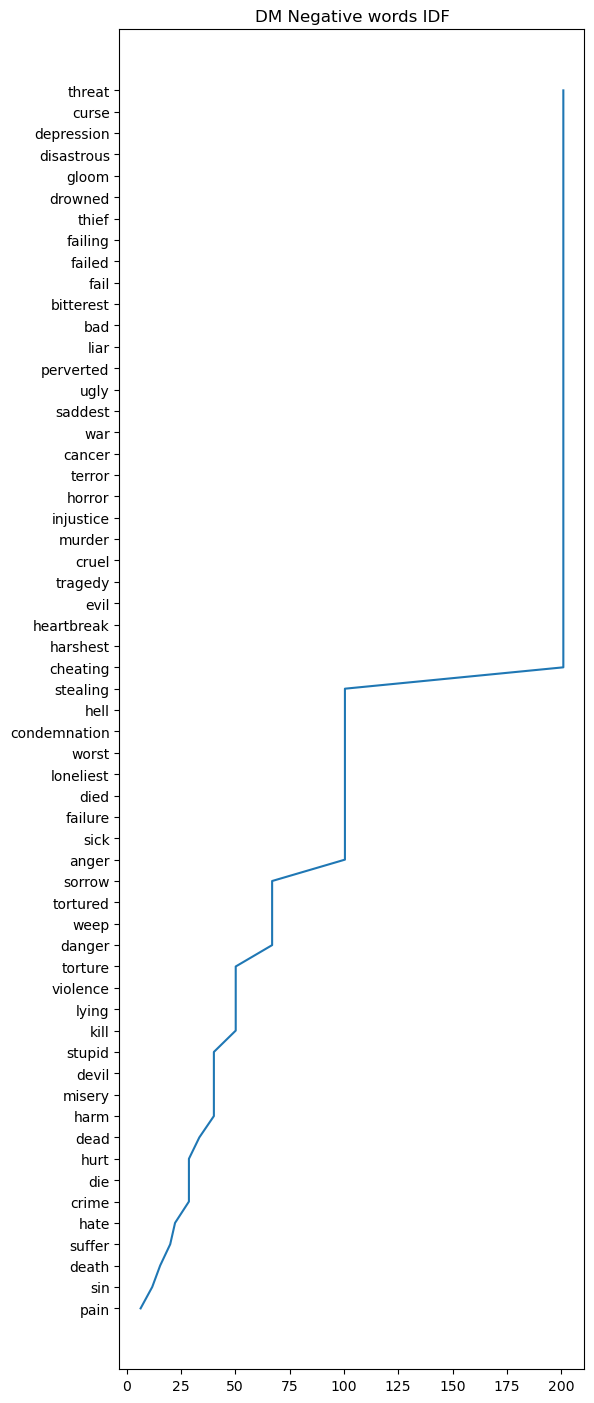

In [208]:
#Show DM Negative words IDF Graph
line_graph(dm_idf_neg, "DM Negative words IDF")

# Show DM Negative words of NLTK freq result

# line_graph(sort_dict(dm_neg_words_nltk_freq), "DM Negative words with NLTK freq")


<h2>Negative Word Cloud</h2>

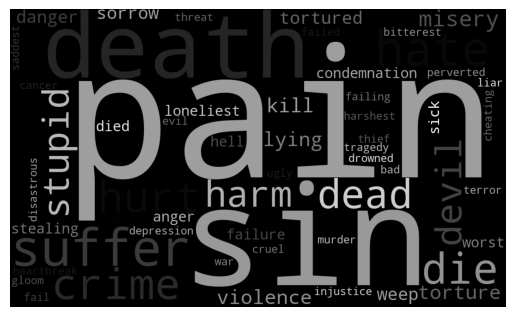

In [209]:
# word cloud to visualize from dict
wc_neg = WordCloud(width = 1000, height = 600 , colormap='binary', background_color='black').generate_from_frequencies(dm_neg_words_nltk_freq)
plt.axis("off")
plt.imshow(wc_neg)


<h2>Positive Word Cloud</h2>

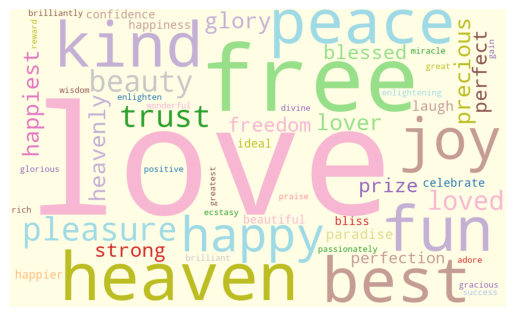

In [210]:
#positive
wc_pos = WordCloud(width = 1000, height = 600, colormap='tab20_r', background_color='#FFFDE4').generate_from_frequencies(dm_pos_words)
plt.axis("off")
plt.imshow(wc_pos)

<!-- With all DM songs -->